In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../Data/train_20k.csv', header=None)
test = pd.read_csv('../Data/test_1k.csv', header=None)

In [5]:
# train 결측치
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [6]:
targetCount = []
for i in sorted(train[0].unique()):
    print(i,":",len(train[train[0]==i]))
    targetCount.append(len(train[train[0]==i]))

print(targetCount)
# target의 갯수 

0 : 1994
1 : 2281
2 : 1929
3 : 2076
4 : 1945
5 : 1776
6 : 1971
7 : 2093
8 : 1922
9 : 2014
[1994, 2281, 1929, 2076, 1945, 1776, 1971, 2093, 1922, 2014]


In [7]:
import numpy as np
np.min(targetCount) / np.max(targetCount)

0.7786058746163963

# Train 과 Test 를 Target(Lable)과 Feature(Data)로 분리하고 정규화 하기 

In [8]:
train_label = train.loc[:,train.columns==0]
train_data = train.loc[:, train.columns!=0]
train_data = train_data/255

test_label = test.loc[:,test.columns==0]
test_data = test.loc[:, test.columns!=0]
test_data = test_data/255

# Deep Learning Model 만들기

In [9]:
from tensorflow import keras

In [12]:
model = keras.Sequential()
#은닉층
model.add(keras.layers.Dense(512, activation='relu',input_shape=(28*28,)))
#출력층
model.add(keras.layers.Dense(10,activation='softmax'))

In [13]:
# 모델 구축하기
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [14]:
# 데이터 훈련하기
hist = model.fit(np.array(train_data),np.array(train_label),epochs=10)

Epoch 1/10


2023-02-28 15:22:43.878901: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


626/626 [==============================] - 2s 2ms/step - loss: 0.3088 - accuracy: 0.9107
Epoch 2/10
626/626 [==============================] - 1s 2ms/step - loss: 0.1269 - accuracy: 0.9626
Epoch 3/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9767
Epoch 4/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.9863
Epoch 5/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0334 - accuracy: 0.9904
Epoch 6/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9931
Epoch 7/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0196 - accuracy: 0.9940
Epoch 8/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0102 - accuracy: 0.9982
Epoch 9/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0092 - accuracy: 0.9976
Epoch 10/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9950


---
## 테스트 데이터로 평가하기

In [17]:
score = model.evaluate(test_data, test_label)
print('loss =',score[0])
print('accuracy =',score[1])

32/32 [==============================] - 0s 865us/step - loss: 0.1185 - accuracy: 0.9670
loss = 0.11846747249364853
accuracy = 0.9670329689979553


---
## predict

In [43]:
test_data.loc[0:4]

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
model.predict(test_data.loc[0:4])
# softmax 라서 각각의 ???? 머시기가 나옴 

1/1 [==============================] - 0s 11ms/step


array([[2.0591265e-12, 2.3831789e-14, 4.0349214e-08, 1.2415306e-07,
        3.0802385e-16, 1.0490370e-11, 2.1834880e-19, 9.9999988e-01,
        2.9005767e-10, 9.9501063e-10],
       [4.0712399e-11, 1.7309515e-04, 9.9967158e-01, 1.5521166e-04,
        3.4854549e-17, 5.8414812e-10, 4.4849308e-10, 7.4560811e-13,
        1.1991499e-07, 8.3092604e-14],
       [1.2375728e-09, 9.9957186e-01, 2.4799816e-05, 3.6801939e-07,
        3.8376047e-06, 1.0819192e-07, 7.7975926e-07, 3.7762948e-04,
        2.0627172e-05, 2.2001201e-08],
       [9.9999881e-01, 1.6777803e-12, 1.3284753e-07, 5.3532578e-10,
        2.5334295e-11, 1.7401550e-07, 2.1565864e-08, 9.0889023e-07,
        8.7801057e-14, 5.6449454e-09],
       [3.2896880e-10, 1.6867072e-10, 6.8459724e-11, 3.8502587e-12,
        9.9988747e-01, 1.3929621e-11, 2.7639236e-11, 4.9740953e-07,
        3.3384590e-11, 1.1206935e-04]], dtype=float32)

In [21]:
np.argmax(model.predict(test_data.loc[0:4]), axis=1)

# np.argmax : 예측값중 최대값의 index를 반환 

1/1 [==============================] - 0s 21ms/step


array([7, 2, 1, 0, 4])

In [23]:
# 그래서 진짜냐? 확인함 보자 
test_label.loc[0:4]

,0
0,7
1,2
2,1
3,0
4,4


---
## 번외 : Image 만들기 

다른 ipynb 로 

In [33]:
img = Image.open('../Data/mnist_test3.jpg')
img

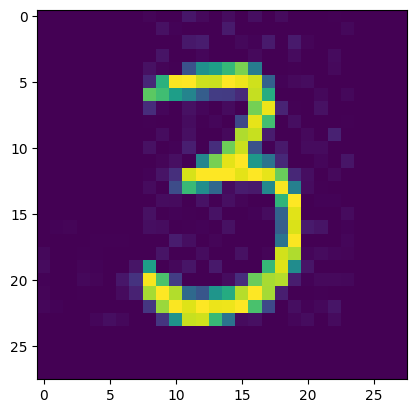

In [34]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [35]:
# Image를 numpy 배열로 변환해서 써보기
imgArray = np.array(img)
imgArray = imgArray/256 # color
imgArray.shape

(28, 28)

In [36]:
# image를 1차원 배열로 
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [51]:
model.predict(pd.DataFrame(imgArray2).T)

1/1 [==============================] - 0s 16ms/step


array([[2.4345611e-11, 2.3308073e-06, 4.0366444e-08, 9.9986041e-01,
        3.8938474e-11, 2.9212510e-05, 3.5261277e-11, 3.3943975e-10,
        1.8463981e-08, 1.0800144e-04]], dtype=float32)

In [53]:
np.argmax(model.predict(pd.DataFrame(imgArray2).T), axis=1)

1/1 [==============================] - 0s 11ms/step


array([3])

### 여러가지 방법이 있겠지만 그중 강사님이 보여주신 답안

In [54]:
imgArray3 = imgArray2.tolist()
dfArray = pd.DataFrame(imgArray3)
dfArray = dfArray

In [55]:
np.argmax(model.predict(dfArray),axis=1)

1/1 [==============================] - 0s 16ms/step


array([3])